In [2]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
matplotlib.style.use('ggplot')

In [3]:
# specify data directory and file
data_dir = '/srv/zooniverse/raw_data/panoptes/all-panoptes-classifications-2017-01-30.csv'
# read csv file of classifications
classification_df = pd.read_csv(data_dir)

/home/sjm668/dev/zooniverse/src/venv/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [80]:
classification_df['created_at'] = pd.to_datetime(classification_df['created_at'],errors='raise')

In [96]:
# create a project dataframe that contains the total number of classifications per project
project_df = classification_df.groupby('project_id').size().to_frame('total_classifications')
# get the number of users per project
users_per_project = classification_df.groupby('project_id')['user_id'].nunique().to_frame('total_users')
# merge with project_df
project_df = project_df.merge(users_per_project,left_index=True,right_index=True).reset_index()

In [100]:
# get first and last classification for each project
sorted_by_dates = classification_df[['project_id','created_at']].sort_values(by='created_at')
first_classification = sorted_by_dates.drop_duplicates(subset='project_id',keep='first').rename(columns={'created_at':'first_classification'})
last_classification = sorted_by_dates.drop_duplicates(subset='project_id',keep='last').rename(columns={'created_at':'last_classification'})
project_df = project_df.merge(first_classification,on='project_id').merge(last_classification,on='project_id')

In [92]:
# create a use dataframe for number of classifications per user
user_df = classification_df.groupby('user_id').size().to_frame('total_classifications')
# get the number of projects per user
projects_per_user = classification_df.groupby('user_id')['project_id'].nunique().to_frame('total_projects')
# merge with user_df
user_df = user_df.merge(projects_per_user,left_index=True,right_index=True).reset_index()

In [93]:
# get the first and last classification for each user
sorted_by_dates = classification_df[['user_id','created_at']].sort_values(by='created_at')
first_classification = sorted_by_dates.drop_duplicates(subset='user_id',keep='first').rename(columns={'created_at':'first_classification'})
last_classification = sorted_by_dates.drop_duplicates(subset='user_id',keep='last').rename(columns={'created_at':'last_classification'})
user_df = user_df.merge(first_classification,on='user_id').merge(last_classification,on='user_id')

In [30]:
# number of projects
len(classification_df['project_id'].unique())

750

In [6]:
# total number of classifications
len(classification_df)

26116438

In [9]:
# total number of users
len(classification_df['user_id'].unique())

87223

In [12]:
# number of projects with gold standard data
len(classification_df.loc[df['gold_standard'] == 't'])

10101

In [15]:
# values for expert classifier
classification_df['expert_classifier'].unique()

array([ nan,   0.,   1.])

In [35]:
# counts for each value of expert classifier
classification_df.groupby('expert_classifier').size()

expert_classifier
0.0    7457
1.0     942
dtype: int64

In [34]:
# classifications without expert classifier
len(classification_df.loc[df['expert_classifier'].isnull()])

26108039

In [38]:
# classifications with expert classifier
len(classification_df.loc[df['expert_classifier'].notnull()])

8399

In [72]:
project_df.describe(percentiles=np.arange(0,1,0.1))

,total_classifications,total_users
count,7.500000e+02,750.000000
mean,3.482192e+04,233.526667
std,2.542708e+05,1135.739423
min,1.000000e+00,1.000000
0%,1.000000e+00,1.000000
10%,1.000000e+00,1.000000
20%,3.000000e+00,1.000000
30.0%,5.000000e+00,1.000000
40%,9.000000e+00,1.000000
50%,1.700000e+01,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f75a8887cf8>]], dtype=object)

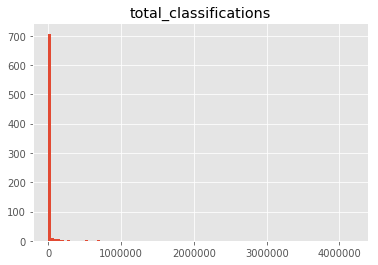

In [50]:
project_df.hist('total_classifications',bins=100)

In [73]:
user_df.describe(percentiles=np.arange(0,1,0.1))

,total_classifications,total_projects
count,87222.000000,87222.000000
mean,234.806712,2.008037
std,1928.976396,2.698327
min,1.000000,1.000000
0%,1.000000,1.000000
10%,3.000000,1.000000
20%,6.000000,1.000000
30.0%,12.000000,1.000000
40%,19.000000,1.000000
50%,30.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f75a83aba58>]], dtype=object)

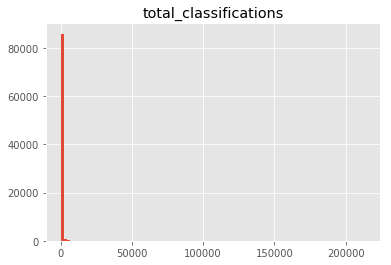

In [55]:
user_df.hist('total_classifications',bins=100)

In [77]:
# number of classifications that don't have a user id
len(classification_df.loc[classification_df['user_id'].isnull()])

5636127

In [76]:
# percent of classifications that don't have a user id
len(classification_df.loc[classification_df['user_id'].isnull()])/len(classification_df)

0.21580764574403294

In [4]:
classification_df.loc[classification_df['user_id'].isnull()]

,id,project_id,user_id,workflow_id,annotations,created_at,user_group_id,completed,gold_standard,expert_classifier,metadata,workflow_version,lifecycled_at
0,6743419,764,NaN,1224,"[{""task"": ""init"", ""value"": 1}]",2016-01-13 07:46:03.869156,2016-01-13 07:46:03.92731,t,NaN,NaN,"{""session"": ""6447163787569179c92064dac989cc6b6...",4.50,2016-01-13 07:46:03.921876
1,11726142,593,NaN,338,"[{""task"": ""T1"", ""value"": [{""choice"": ""NTHNGHR""...",2016-04-26 20:16:43.011371,2016-04-26 20:16:43.102913,t,NaN,NaN,"{""viewport"": {""width"": 1366, ""height"": 665}, ""...",1890.18,2016-04-26 20:16:43.064178
5,6203753,764,NaN,1224,"[{""task"": ""init"", ""value"": 1}]",2016-01-12 22:44:22.724827,2016-01-12 22:44:50.200208,t,NaN,NaN,"{""session"": ""c581c7187116f44178ba479667deb68a2...",4.50,2016-01-12 22:44:50.183696
13,6202914,764,NaN,1224,"[{""task"": ""init"", ""value"": 1}]",2016-01-12 22:43:51.926823,2016-01-12 22:44:34.85784,t,NaN,NaN,"{""session"": ""d48a27be4323a3cffbc2d99eedce208e1...",4.50,2016-01-12 22:44:34.841401
14,6203476,764,NaN,1224,"[{""task"": ""init"", ""value"": 0}]",2016-01-12 22:44:10.567062,2016-01-12 22:44:44.954315,t,NaN,NaN,"{""session"": ""dbce20773a3da115709c4871e1bf698e5...",4.50,2016-01-12 22:44:44.927203
16,6204241,764,NaN,1224,"[{""task"": ""init"", ""value"": 1}]",2016-01-12 22:44:46.484366,2016-01-12 22:44:59.529159,t,NaN,NaN,"{""session"": ""c0065b9c5efff4fc93d12c5285a75f512...",4.50,2016-01-12 22:44:59.508311
22,11720618,3,NaN,1623,"[{""task"": ""init"", ""value"": 0}]",2016-04-26 19:03:02.51404,2016-04-26 19:03:02.552188,t,NaN,NaN,"{""session"": ""92bd27e6797f9b0cd7bcf7b09c0acf01f...",5.16,2016-04-26 19:03:02.545556
23,6202915,764,NaN,1224,"[{""task"": ""init"", ""value"": 1}]",2016-01-12 22:43:51.98791,2016-01-12 22:44:35.728133,t,NaN,NaN,"{""session"": ""2955c62ca8754f5b86eb36cf836e80be1...",4.50,2016-01-12 22:44:35.613859
24,6202997,764,NaN,1224,"[{""task"": ""init"", ""value"": 1}]",2016-01-12 22:43:55.669121,2016-01-12 22:44:36.315538,t,NaN,NaN,"{""session"": ""a22fd1484c1f8a908755712e534751692...",4.50,2016-01-12 22:44:36.280675
27,6203953,764,NaN,1224,"[{""task"": ""init"", ""value"": 1}]",2016-01-12 22:44:33.168229,2016-01-12 22:44:54.005072,t,NaN,NaN,"{""session"": ""f78833fe778e7f1227196969603f485ae...",4.50,2016-01-12 22:44:53.986343
